In [178]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from librosa.feature import mfcc
import librosa

In [179]:
# Read the input file
sampling_freq, audio = wavfile.read('./test_bonjour.wav')

print('\nShape:', audio.shape)
print('Datatype:', audio.dtype)
print('Duration:', round(audio.shape[0] / float(sampling_freq), 3), 'seconds')


Shape: (124286, 2)
Datatype: int16
Duration: 2.589 seconds


C:\Users\thega\AppData\Local\Temp\ipykernel_9980\4286273315.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_freq, audio = wavfile.read('./test_bonjour.wav')


<function matplotlib.pyplot.show(close=None, block=None)>

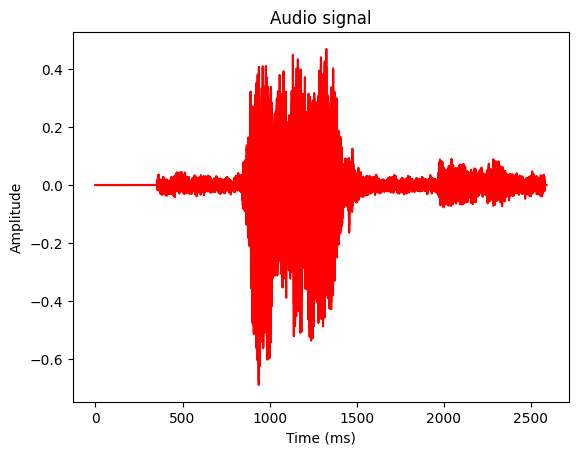

In [180]:
# Normalize the values
audio = audio/2.**15

x_values = np.arange(0, len(audio), 1) / float(sampling_freq)
x_values *= 1000 

# Plot the audio signal in time
plt.plot(x_values, audio, color='red')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Audio signal')
plt.show

In [181]:
print("without fourier transformation:", audio.shape)

# Perform Fourier transform
transformed_signal = np.fft.fft(audio)
print("with fourier transformation:", transformed_signal.shape)

without fourier transformation: (124286, 2)
with fourier transformation: (124286, 2)


In [182]:
# Define the signal duration and sample rate
audio = audio / (2.**15)
len_audio = len(audio)

# Apply Fourier transform
transformed_signal = np.fft.fft(audio)
print("transformed_signal:", transformed_signal)

transformed_signal: [[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]


In [183]:
# Define length of the frequency transformed signal
half_length = np.ceil((len_audio + 1) / 2.0)
half_length=int(half_length)

# Take the absolute value of Fourier transform
transformed_signal = abs(transformed_signal[0:half_length])
transformed_signal **= 2

print("transformed_signal:", transformed_signal)

transformed_signal: [[0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 ...
 [1.29836775e-11 2.50120237e-13]
 [1.99840144e-11 1.45803508e-13]
 [2.86472313e-11 2.98865967e-13]]


C:\Users\thega\AppData\Local\Temp\ipykernel_9980\1179858838.py:2: RuntimeWarning: divide by zero encountered in log10
  power = 20 * np.log10(transformed_signal)


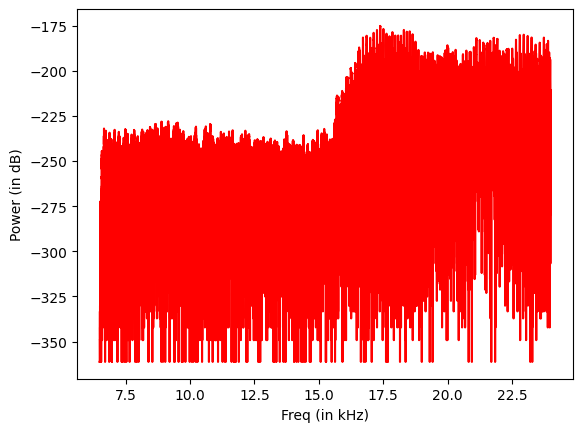

In [184]:
# Build the x axis
power = 20 * np.log10(transformed_signal)
x_values = np.arange(0, half_length, 1) * (sampling_freq / len_audio) / 1000.0

# Plot the figure
plt.figure()
plt.plot(x_values, power, color='red')
plt.xlabel('Freq (in kHz)')
plt.ylabel('Power (in dB)')
plt.show()

In [185]:
# Extract MFCC features
duration = 3  # seconds
sampling_freq = 44100  # Hz
tone_freq = 587
min_val = -2 * np.pi
max_val = 2 * np.pi

# Generate audio
t = np.linspace(min_val, max_val, duration * sampling_freq)
audio = np.sin(2 * np.pi * tone_freq * t)

# Add noise to the audio
noise = 0.4 * np.random.rand(duration * sampling_freq)
audio += noise
print("audio:", audio)
print("noise:", noise)

audio: [-0.6996765  -0.52792907 -0.4480183  ...  0.93111588  1.01422861
  1.37593553]
noise: [0.29226027 0.36026322 0.22853401 ... 0.25456357 0.12603632 0.38399876]


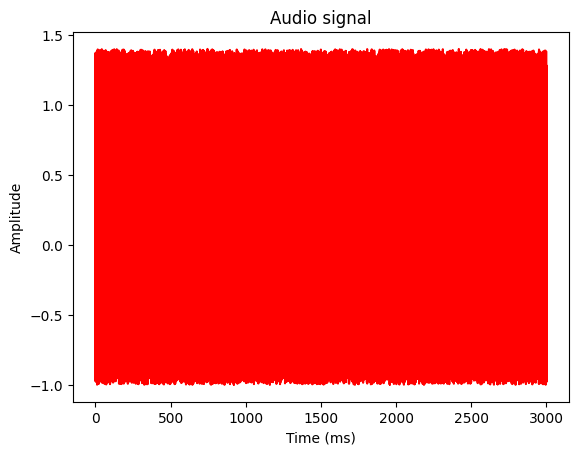

In [186]:
# Scale it to 16-bit integer values
scaling_factor = pow(2,15) - 1
audio_normalized = audio / np.max(np.abs(audio))
audio_scaled = np.int16(audio_normalized * scaling_factor)

# audio = audio[:150]

x_values = np.arange(0, len(audio), 1) / float(sampling_freq)
x_values *= 1000

plt.plot(x_values, audio, color='red')

plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Audio signal')
plt.show()

In [187]:
# Convert audio data to numpy.ndarray
audio = np.array(audio)

# Extract MFCC features 
mfcc_features = mfcc(y=audio, sr=sampling_freq)
print('\nNumber of windows =', mfcc_features.shape[0])
print('Length of each feature =', mfcc_features.shape[1])


Number of windows = 20
Length of each feature = 259


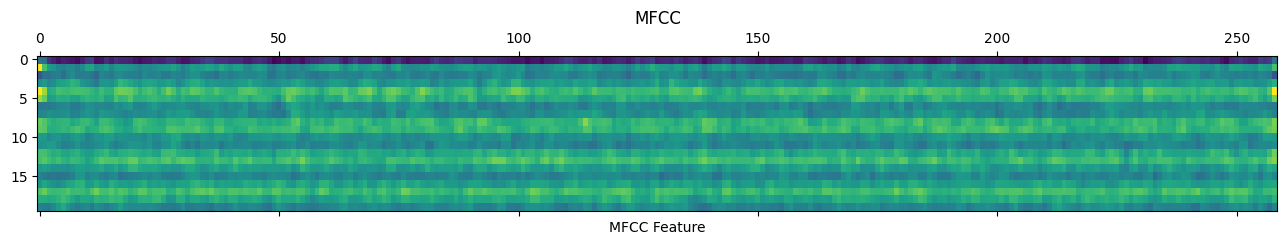

In [189]:
# Print the MFCC feature
mfcc_features = mfcc_features.T
plt.matshow(mfcc_features, aspect='auto')
plt.xlabel('MFCC Feature')
plt.title('MFCC')
plt.show()